In [3]:
!pip install opencv-python


                                              0.0/39.5 MB ? eta -:--:--
                                              0.3/39.5 MB 6.1 MB/s eta 0:00:07
     -                                        1.2/39.5 MB 14.8 MB/s eta 0:00:03
     ----                                     4.0/39.5 MB 31.7 MB/s eta 0:00:02
     -----                                    5.0/39.5 MB 29.2 MB/s eta 0:00:02
     -----                                    5.7/39.5 MB 28.2 MB/s eta 0:00:02
     -------                                  7.9/39.5 MB 33.7 MB/s eta 0:00:01
     ---------                                9.3/39.5 MB 31.3 MB/s eta 0:00:01
     ----------                              10.4/39.5 MB 34.4 MB/s eta 0:00:01
     -------------                           13.4/39.5 MB 36.3 MB/s eta 0:00:01
     ----------------                        16.2/39.5 MB 46.7 MB/s eta 0:00:01
     -----------------                       17.6/39.5 MB 40.9 MB/s eta 0:00:01
     -------------------                     19.6

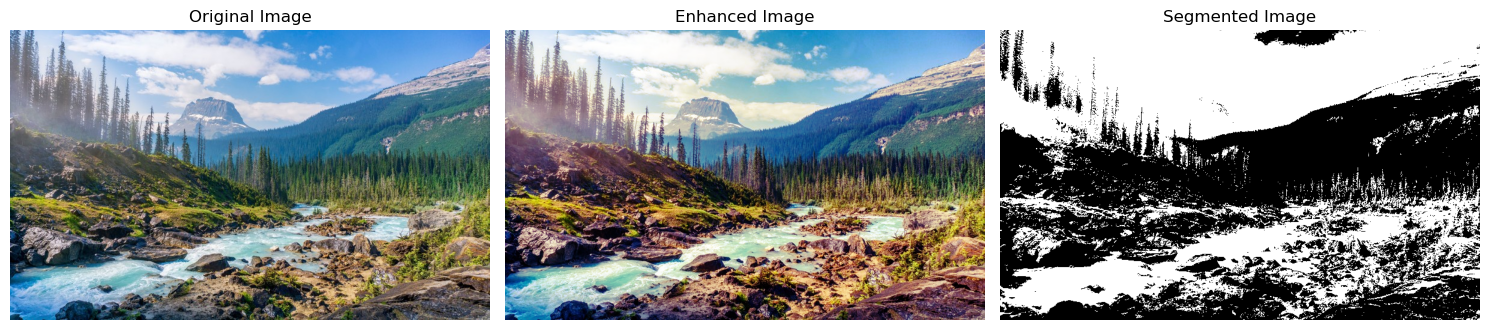

In [11]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('nature.jpg')
if image is None:
    raise ValueError("Error: Could not load the image. Please check the file path.")

# Enhance the image using histogram equalization for each channel
enhanced_image = cv2.merge([cv2.equalizeHist(channel) for channel in cv2.split(image)])

# Convert the enhanced image to grayscale
gray_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's method for thresholding
threshold_value = threshold_otsu(gray_image)
segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Original Image", "Enhanced Image", "Segmented Image"]
images = [image, enhanced_image, segmented_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()